# P2: Investigate a Dataset

### For this project, we investigate a dataset with baseball statistics.   

### [Here](http://www.seanlahman.com/baseball-archive/statistics/) is the complete baseball dataset.  This analysis investigates the Batting.csv file.  Now that we have aquired our data, we read in data for cleansing and exploration.

><font color='grey'> The data analysis process consists of five steps. A question is step one.  The second is data wrangling, which consists of data aquisition and data cleansing.  The third step is data exploration, where we take time to get familiar and investigate the data.  The fourth step is to draw conclusions or identify any patterns or learning. The final step is to communicate and or take action where possible.     </font>


In [560]:
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

filename = '/udacity/p2/Batting.csv'
batting_df = pd.read_csv(filename)

#Summary of data
print batting_df.info()
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

'''
# Legend with long descriptions for the data columns

* G              -  Games
* AB             -  At Bats
* R              -  Runs
* H              -  Hits
* 2B             -  Doubles
* 3B             -  Triples
* HR             -  Homeruns
* RBI            -  Runs Batted In
* SB             -  Stolen Bases
* CS             -  Caught Stealing
* BB             -  Base on Balls
* SO             -  Strikeouts
* IBB            -  Intentional walks
* HBP            -  Hit by pitch
* SH             -  Sacrifice hits
* SF             -  Sacrifice flies
* GIDP           -  Grounded into double plays
'''

#Show first five rows
print batting_df.head(5)

#Show last five rows
print batting_df.tail(5)

Populating the interactive namespace from numpy and matplotlib
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
playerID    101332 non-null object
yearID      101332 non-null int64
stint       101332 non-null int64
teamID      101332 non-null object
lgID        100595 non-null object
G           101332 non-null int64
AB          96183 non-null float64
R           96183 non-null float64
H           96183 non-null float64
2B          96183 non-null float64
3B          96183 non-null float64
HR          96183 non-null float64
RBI         95759 non-null float64
SB          94883 non-null float64
CS          72729 non-null float64
BB          96183 non-null float64
SO          88345 non-null float64
IBB         59620 non-null float64
HBP         93373 non-null float64
SH          89845 non-null float64
SF          60151 non-null float64
GIDP        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.0

### The range index is 101,332 with 22 data columns.  The data types are mostly float64, with a few objects and int.
### The primary key is playerID. A playerID row has four dimensions:

* yearID - season on record, we can use this to show change over time
* stint - ordered appearances within season, a player may have multiple stints within the same year for the same team
* teamID - a player can play on multiple teams in one year
* lgID - teams belong to a league

### The other 17 fields contain numeric values.  Let's spend time exploring that.  The describe function shows various summary statistics.  
### Let's evalutate the summary stats then come up with some questions to ask.  

In [561]:
#Various summary statistics
batting_df.describe().transpose()
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

,count,mean,std,min,25%,50%,75%,max
yearID,101332.0,1963.506533,38.628278,1871.0,1933.0,1972.0,1997.00,2015.0
stint,101332.0,1.077567,0.283676,1.0,1.0,1.0,1.00,5.0
G,101332.0,51.400111,47.145273,0.0,13.0,34.0,80.25,165.0
AB,96183.0,149.970327,186.557072,0.0,NaN,NaN,NaN,716.0
R,96183.0,19.887038,28.671365,0.0,NaN,NaN,NaN,192.0
H,96183.0,39.261647,53.310941,0.0,NaN,NaN,NaN,262.0
2B,96183.0,6.637067,9.801563,0.0,NaN,NaN,NaN,67.0
3B,96183.0,1.373361,2.710547,0.0,NaN,NaN,NaN,36.0
HR,96183.0,2.949305,6.409662,0.0,NaN,NaN,NaN,73.0
RBI,95759.0,17.965163,26.756514,0.0,NaN,NaN,NaN,191.0


### The minimum year is 1871, and the maximum year is 2015!  This means we have 144 years of baseball data.  We also see the maximum stint is 5 and maximum games played is 165.  That means no player has ever had more than 5 appearances on a team or played more than 165 games within a season.

### Since there are null values in some data columns, the output from the describe functions are incomplete.  We can use fillna to replace the null values with 0. 

In [562]:
# Use fillna to remove NaN from describe output
clean_batting_df = batting_df.fillna(0)
clean_batting_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yearID,101332.0,1963.506533,38.628278,1871.0,1933.0,1972.0,1997.00,2015.0
stint,101332.0,1.077567,0.283676,1.0,1.0,1.0,1.00,5.0
G,101332.0,51.400111,47.145273,0.0,13.0,34.0,80.25,165.0
AB,101332.0,142.349860,184.715535,0.0,4.0,49.0,233.00,716.0
R,101332.0,18.876515,28.272802,0.0,0.0,4.0,28.00,192.0
H,101332.0,37.266638,52.649683,0.0,0.0,9.0,58.00,262.0
2B,101332.0,6.299816,9.659895,0.0,0.0,1.0,9.00,67.0
3B,101332.0,1.303576,2.657951,0.0,0.0,0.0,1.00,36.0
HR,101332.0,2.799441,6.278191,0.0,0.0,0.0,2.00,73.0
RBI,101332.0,16.977125,26.330811,0.0,0.0,3.0,24.00,191.0


### Note, the NaN values have been replaced by zeros in clean_batting_df.   It would be wise to exclude the zeros when looking at the IQR.  With data aquistion and cleansing complete for now, let's ask a few questions.  

### Question 1: Which playerID has the maximum games played in a year for a team?

In [563]:
# sum Games by year, league, team and player
sumGames_byYearbyLeaguebyTeambyPlayer = batting_df.groupby(['yearID','lgID','teamID','playerID']).sum()['G']
sumGames_byYearbyLeaguebyTeambyPlayer.sort_values(ascending=False).head(10)

yearID  lgID  teamID  playerID 
1962    NL    LAN     willsma01    165
1967    AL    MIN     tovarce01    164
1965    NL    CHN     santoro01    164
1962    NL    SFN     paganjo01    164
1965    NL    CHN     willibi01    164
1967    NL    PIT     mazerbi01    163
1968    NL    CHN     willibi01    163
1969    NL    CHN     willibi01    163
1989    NL    SLN     oquenjo01    163
1965    NL    CHN     bankser01    163
Name: G, dtype: int64

> <font color='red'> Answer 1: PlayerID willsma01 played 165 games in 1962 for teamID LAN in lgID NL.  </font>

### Question 2: Can we locate information about playerID willsma01 in the master.csv file?

In [564]:
# Locate player ID willsma01 in masters file

filename_master = '/udacity/p2/Master.csv'
master_df = pd.read_csv(filename_master)

master_df.loc[master_df['playerID'] == 'willsma01'].transpose()


,18320
playerID,willsma01
birthYear,1932
birthMonth,10
birthDay,2
birthCountry,USA
birthState,DC
birthCity,Washington
deathYear,NaN
deathMonth,NaN
deathDay,NaN


> <font color='red'> Answer 2: Maury Wills is the player who played 165 games in 1962. </font>


### Question 3: Is the maximum games played by year linear or steady?

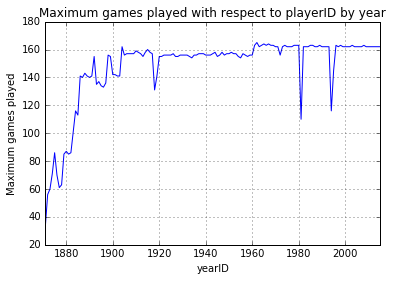

In [565]:
# Plot maximum games played by year
maxGames_byYear = batting_df.groupby(['yearID']).max()['G']
maxGames_byYear.plot(grid=True)

# Label Y axis
ylabel('Maximum games played')

# Add Title
title('Maximum games played with respect to playerID by year')

### The maximum games played in any season for a player increased from 1880 to 1900.  There was a fluxuation from 1900 to 1920 then a consistent trend.  Let's look at a histogram of the last 50 years.

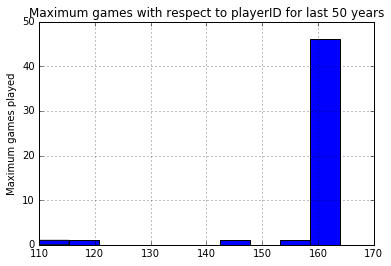

In [566]:
# Print maximum games played for last 50 years
maxGames_byYear.tail(50).hist()
ylabel('Maximum games played')
title('Maximum games with respect to playerID for last 50 years')

### In the last 50 years, there are three years where no player has played more than 150 games per season. 

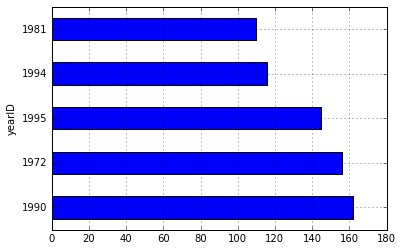

In [567]:
# Sort values to find identify years where no player played more than 150 games 
tailMaxGames_byYear = maxGames_byYear.tail(50)
tailMaxGames_byYear = tailMaxGames_byYear.sort_values(ascending=True)
y_val = tailMaxGames_byYear.head().sort_values(ascending=False)

fig = y_val.plot(kind='barh',grid=True)

> <font color='red'> Answer 3: Yes,the maximum games played is stable with values near 160 games subsquent 1920.  There are two noticeable dips where the maximum games played dropped.  Both 1981 and 1994 were shortened seasons due to player strikes.  The 1994 strike impacted the start of the 1995 season. </font>

### Question 4: Which player holds the record for the most runs scored in any year on a team?  


In [568]:
# sum Games by year, league, team and player
sumRun_byYearbyLeaguebyTeambyPlayer = batting_df.groupby(['yearID','lgID','teamID','playerID']).sum()['R']
sumRun_byYearbyLeaguebyTeambyPlayer.sort_values(ascending=False).head(10).reset_index()

,yearID,lgID,teamID,playerID,R
0,1894,NL,PHI,hamilbi01,192.0
1,1921,AL,NYA,ruthba01,177.0
2,1891,AA,BS2,brownto01,177.0
3,1936,AL,NYA,gehrilo01,167.0
4,1887,AA,SL4,oneilti01,167.0
5,1895,NL,PHI,hamilbi01,166.0
6,1894,NL,BLN,kellejo01,165.0
7,1894,NL,BLN,keelewi01,165.0
8,1931,AL,NYA,gehrilo01,163.0
9,1928,AL,NYA,ruthba01,163.0


> <font color='red'> Answer 4: PlayerID hamilbi01 scored 192 runs in 1894 with team PHI in league NL.  Let's look at the runs (R) data column the same way we looked at games (G). </font>

### Question 5: Is the maximum runs for the past 50 years scored by year linear or steady?

Axes(0.125,0.125;0.775x0.775)


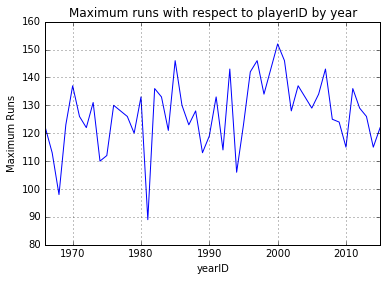

In [569]:
# Plot maximum games played by year
maxRuns_byYear = batting_df.groupby(['yearID']).max()['R']
print maxRuns_byYear.tail(50).plot(grid=True)
ylabel('Maximum Runs')
title('Maximum runs with respect to playerID by year')

> <font color='red'> Answer 5: The maximum runs scored per season by any player ranges from 90 to 150 over the past 50 years.  The number is not steady, and has trended down over ethe last five years. </font>

### Question 6: How have runs scored by year changed over the years?

Axes(0.125,0.125;0.775x0.775)


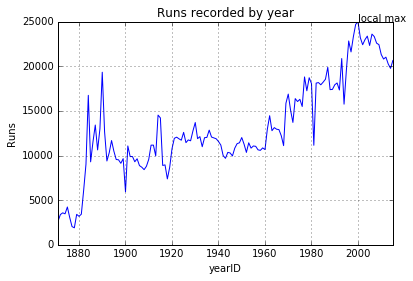

In [570]:
sumRuns_byYear = batting_df.groupby('yearID').sum()['R']
print sumRuns_byYear.plot(grid=True)
ylabel('Runs')
title('Runs recorded by year')
plt.annotate('local max', xy=(2000, 24971), xytext=(2000, 24971.0),
            arrowprops=dict(),
            )

Axes(0.125,0.125;0.775x0.775)
yearID
1991    18127.0
1992    17341.0
1993    20864.0
1994    15752.0
1995    19554.0
1996    22831.0
1997    21604.0
1998    23297.0
1999    24691.0
2000    24971.0
2001    23199.0
2002    22408.0
2003    22978.0
2004    23376.0
2005    22325.0
2006    23599.0
2007    23322.0
2008    22585.0
2009    22419.0
2010    21308.0
2011    20808.0
2012    21017.0
2013    20255.0
2014    19761.0
2015    20647.0
Name: R, dtype: float64


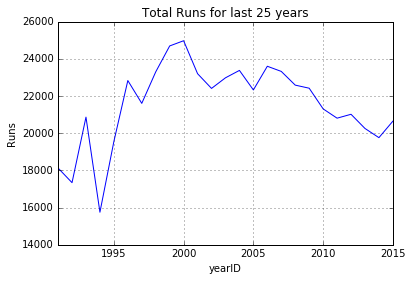

In [571]:
print sumRuns_byYear.tail(25).plot(grid=True)
ylabel('Runs')
title('Total Runs for last 25 years')
print sumRuns_byYear.tail(25)

> <font color = 'red'> Answer6: The total runs scored are trending down since 2005. The total runs scored are back to 1995 levels, and 1995 was a strike shortened season.  Fewer runs may result in less excitement or entertainment for some fans of baseball. </font>


### Question 7: Is the decline in runs due to fewer players in the dataset?

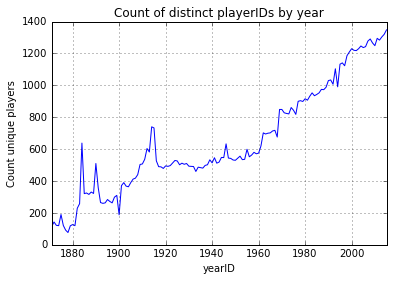

In [572]:
# Get unique count of players per year, is the decline in runs due to fewer players
numPlayers_byYear = batting_df.groupby(['yearID']).playerID.nunique()
numPlayers_byYear.plot(grid=True)
ylabel('Count unique players')
title('Count of distinct playerIDs by year')

> <font color='red'>Answer 7: No, the number of distinct players is increasing.  The average number of runs scored per player by year must be trending down since the count of distinct players is increasing.</font>

### Question 8: For all players, even the ones with limited games (G) played or at-bats (AB),  how is the average runs scored per player trending over the last 25 years.

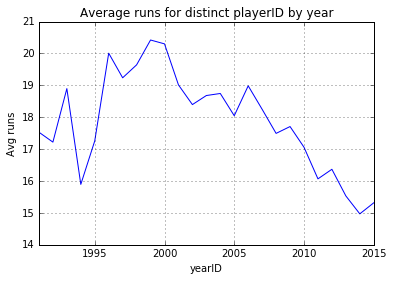

In [573]:
# Get the number of runs per year per player
avgRuns_byYear_perPlayer = sumRuns_byYear / numPlayers_byYear

avgRuns_byYear_perPlayer.tail(25).plot(grid=True)
ylabel('Avg runs')
title('Average runs for distinct playerID by year')

> <font color='red'>Answer 8: The average number of runs scored per distinct players is decreasing as expected.  It's looking more and more like the runs scored are decreasing.  </font>

### Question 9: What is the correlation like between runs (R) and other data columns?

In [574]:
sumSOs_byYear = clean_batting_df.groupby('yearID').sum()['SO']
sumHRs_byYear = batting_df.groupby('yearID').sum()['HR']
sumBBs_byYear = clean_batting_df.groupby('yearID').sum()['BB']
sumRBIs_byYear = clean_batting_df.groupby('yearID').sum()['RBI']
sumABs_byYear = clean_batting_df.groupby('yearID').sum()['AB']

print pearsonr(sumRuns_byYear,sumHRs_byYear)
print pearsonr(sumRuns_byYear,sumSOs_byYear)
print pearsonr(sumRuns_byYear,sumBBs_byYear)
print pearsonr(sumSOs_byYear,sumHRs_byYear)

(0.90824992256478876, 5.7076199148221909e-56)
(0.89393966466030983, 1.0719464405259148e-51)
(0.95227629829030314, 1.4048631835047909e-75)
(0.96524224287435623, 3.184984717550824e-85)


> <font color='red'> Answer 9: There are strong correlations between HR and SO, and Runs and Walks.  The p-values are also below 0.05 so the resuls are significant.

### Question 10: How do these correlations change when we group the data by team and year?

In [575]:
sumSOs_byYear_byTeam = clean_batting_df.groupby(['yearID','teamID']).sum()['SO']
sumRs_byYear_byTeam = clean_batting_df.groupby(['yearID','teamID']).sum()['R']
sumHRs_byYear_byTeam = clean_batting_df.groupby(['yearID','teamID']).sum()['HR']
sumBBs_byYear_byTeam = clean_batting_df.groupby(['yearID','teamID']).sum()['BB']


SOs_per_R_byYear_byTeam = sumSOs_byYear_byTeam / sumRs_byYear_byTeam
SOs_per_R_byYear_byTeam.sort_values(ascending=False)
print pearsonr(sumSOs_byYear_byTeam,sumRs_byYear_byTeam)
pearsonr(sumHRs_byYear_byTeam,sumRs_byYear_byTeam)

(0.2668135747820406, 6.3059282412679292e-47)


(0.50052718789641415, 8.878599214023007e-178)

In [576]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

runs = sumRs_byYear_byTeam
HR = sumHRs_byYear_byTeam
BB = sumBBs_byYear_byTeam
SO = sumSOs_byYear_byTeam


print correlation(runs, HR)
print correlation(runs, BB)
print correlation(runs, SO)
print correlation(HR, SO)
print correlation(BB, SO)
print correlation(HR, BB)

0.500527187896
0.647020885617
0.266813574782
0.818377242427
0.556885076235
0.600899538737


> <font color='red'> Answer 10: The strongest correlation is between HR and SO.  SO and R also have a moderately weak correlation at 0.2668.  This implies teams with higher HR have more SO. On the other hand, while the correlation is not as strong teams with higher SO have lower R.  The strong positive correlation between HR and SO imply teams with more HR have more SO. </font>  

### <font color='blue'> Conclusion: This analysis shows that runs are trending down over the past 20 years, which could be a problem for some baseball fans. </font>

### <font color='blue'> The investigation started by looking at the sum of games played per year.  There we saw the maximum games played per year is 165; the actual games played are closer to 162 in more recent years.  This means players are playing nearly the same number of games.  Then we saw how runs (R) and base-on-balls (BB) are trending down over time while Strike outs (SO) are increasing and home runs (HR) are flat. When looking at correlations grouped by team and year, there is a strong positive correlation between HR and SO and the correlation between HR and R is less than the correlation between BB and R. This implies a team should look for players with high BB totals.  </font>

### <font color='blue'> Additional followup questions could include analyzing the between HR, SO, BB and R.  How should a team value a player with high BB, low HR and low SO?  Would that player contribute more runs than a player with low BB, high HR and high SO?  From a macro level, what is the relationship between runs scored and the win-loss records over time?  How do runs scored impact a team win-loss record?    </font> 

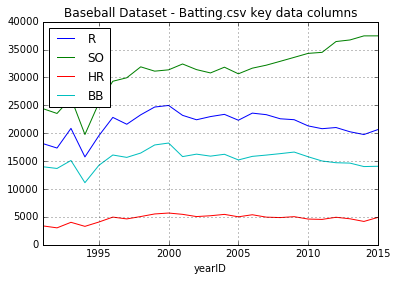

In [577]:
sumRuns_byYear.tail(25).plot(legend=True,grid=True,title = 'Baseball Dataset - Batting.csv key data columns')
sumSOs_byYear.tail(25).plot(legend=True,grid=True,title = 'Baseball Dataset - Batting.csv key data columns')
sumHRs_byYear.tail(25).plot(legend=True,grid=True,title = 'Baseball Dataset - Batting.csv key data columns')
sumBBs_byYear.tail(25).plot(legend=True,grid=True,title = 'Baseball Dataset - Batting.csv key data columns')